In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.impute import KNNImputer

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%matplotlib inline

./d1v2.ipynb
./DA_1a.ipynb
./differences.csv
./hackathon.ipynb
./hacktest.csv
./hacktrain.csv
./hello.py
./mystuff.ipynb
./nesterov.py
./starter_for_hackathon.ipynb
./submission_2.csv
./submission_laarson3.csv
./submission_Larson1.csv
./submission_larson2.csv
./trial.csv
./random_search_outputs\degree_1\progress.json
./random_search_outputs\degree_1\models\model_0.pkl
./random_search_outputs\degree_1\reports\report_0.txt


In [127]:
df = pd.read_csv("./hacktrain.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,943.698,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,1401.970,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,NaN,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,770.469,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [128]:
df['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          8000 non-null   int64  
 1   class       8000 non-null   object 
 2   20150720_N  7440 non-null   float64
 3   20150602_N  6800 non-null   float64
 4   20150517_N  7200 non-null   float64
 5   20150501_N  7040 non-null   float64
 6   20150415_N  7520 non-null   float64
 7   20150330_N  6880 non-null   float64
 8   20150314_N  7280 non-null   float64
 9   20150226_N  6640 non-null   float64
 10  20150210_N  7360 non-null   float64
 11  20150125_N  6960 non-null   float64
 12  20150109_N  7120 non-null   float64
 13  20141117_N  6720 non-null   float64
 14  20141101_N  7600 non-null   float64
 15  20141016_N  6560 non-null   float64
 16  20140930_N  7200 non-null   float64
 17  20140813_N  7440 non-null   float64
 18  20140626_N  6400 non-null   float64
 19  20140610_N  7520 non-null  

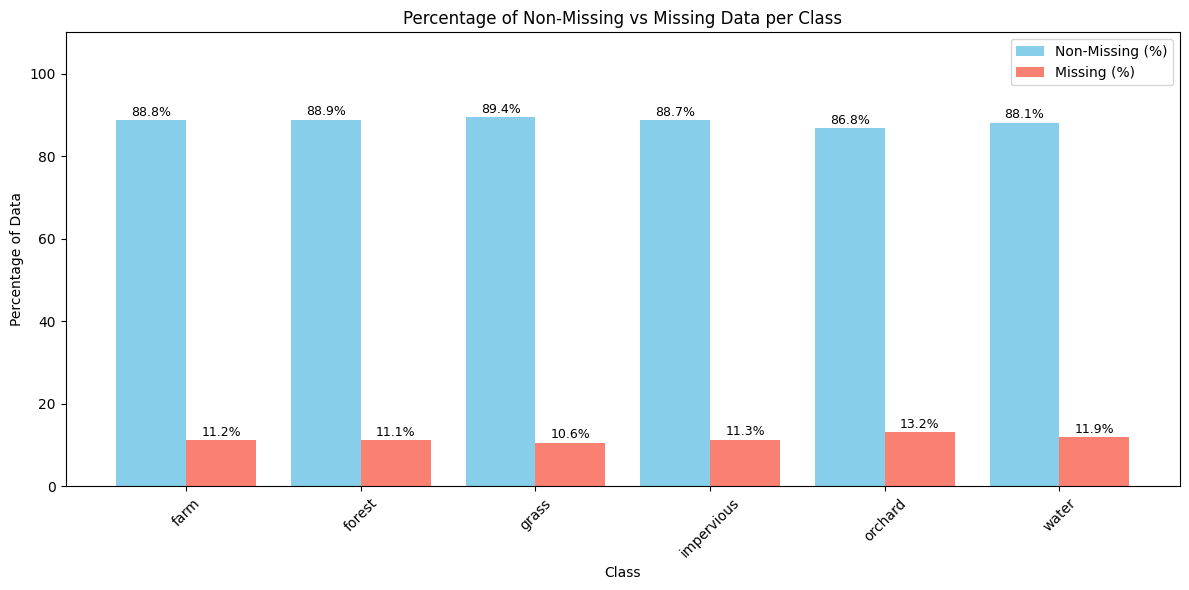

In [130]:
grouped = df.groupby('class')

# Total rows per class
total_per_class = grouped.size()

# Non-null counts per class (excluding 'class' column)
non_null_counts = grouped.count()
non_null_totals = non_null_counts.sum(axis=1)

# Total possible values = rows * number of features (excluding 'class')
total_possible = total_per_class * (df.shape[1] - 1)

# Calculate percentages
non_missing_pct = (non_null_totals / total_possible) * 100
missing_pct = 100 - non_missing_pct

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.4
classes = non_missing_pct.index
x = range(len(classes))

# Bars
bars1 = plt.bar(x, non_missing_pct, width=bar_width, label='Non-Missing (%)', color='skyblue')
bars2 = plt.bar([i + bar_width for i in x], missing_pct, width=bar_width, label='Missing (%)', color='salmon')

# Annotations
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

# Labels and layout
plt.xlabel('Class')
plt.ylabel('Percentage of Data')
plt.title('Percentage of Non-Missing vs Missing Data per Class')
plt.xticks([i + bar_width / 2 for i in x], classes, rotation=45)
plt.ylim(0, 110)
plt.legend()
plt.tight_layout()
plt.show()

ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64 




<Axes: >

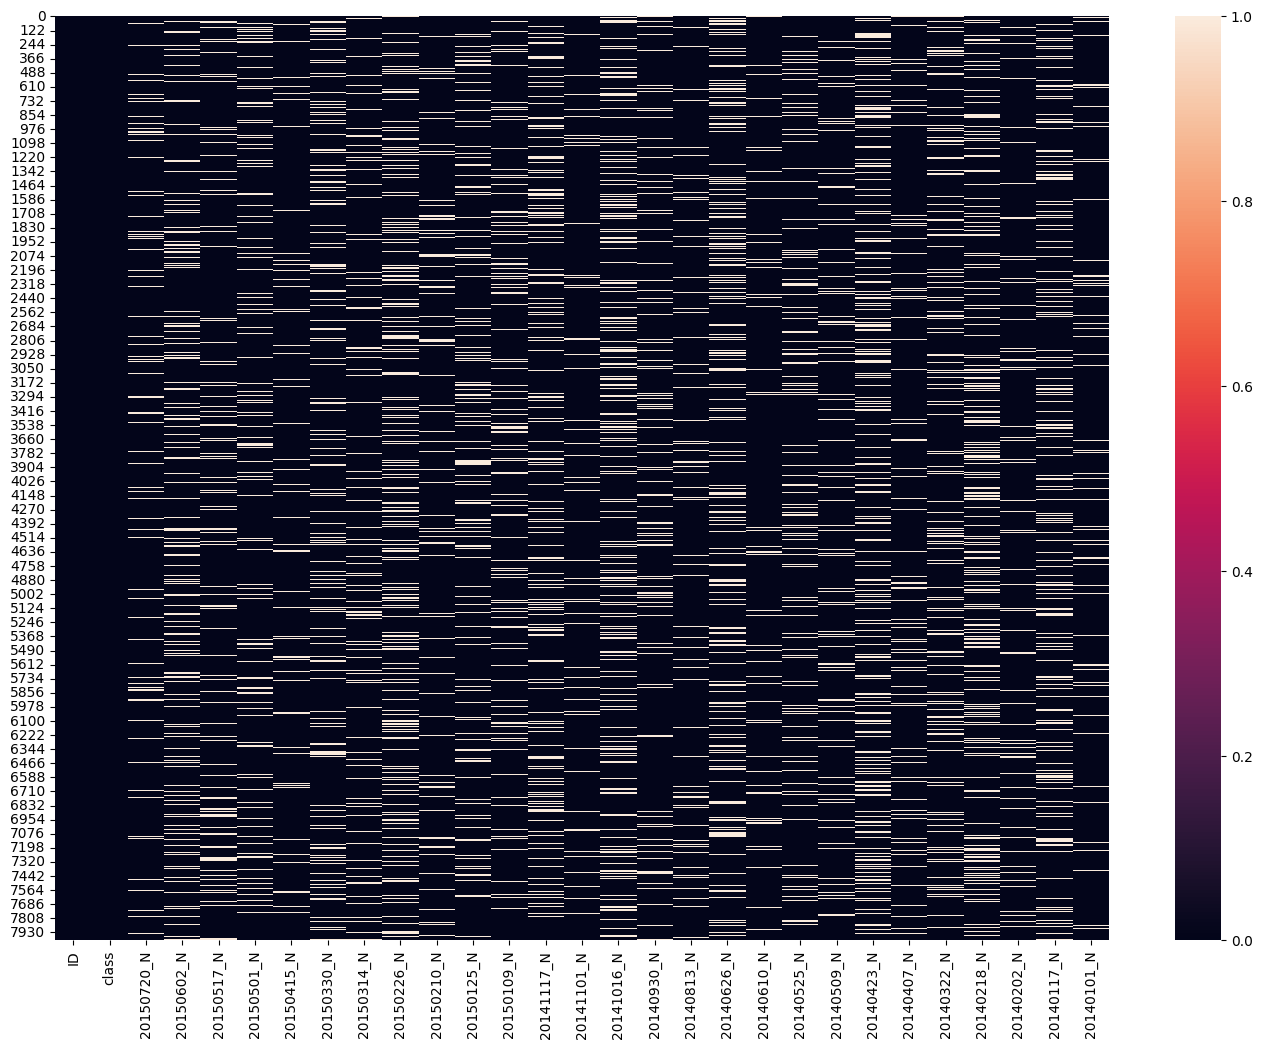

In [131]:
print(df.isnull().sum(), '\n\n')

# print(df[df.duplicated()])  # it is 0
plt.figure(figsize=(17, 12))
sns.heatmap(df.isnull())

In [132]:
print(df[['class']].value_counts())

class     
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


# Imputation of Farm Class

In [133]:
df_farm = df[df['class'] == 'farm'].copy()
missing_summary = df_farm.isnull().sum()
missing_percentage = (missing_summary / len(df_farm)) * 100
print(missing_percentage.sort_values(ascending=False))

20140626_N    22.592152
20140423_N    21.640904
20140218_N    18.073722
20141016_N    17.360285
20150226_N    16.884661
20140117_N    16.765755
20141117_N    16.052319
20150330_N    15.101070
20150602_N    14.387634
20150125_N    12.841855
20150501_N    12.485137
20140322_N    12.247325
20150109_N    11.771700
20140930_N    10.939358
20150314_N     9.631391
20140509_N     9.393579
20150517_N     9.274673
20150210_N     8.799049
20140202_N     8.204518
20140813_N     7.966706
20140407_N     7.847800
20140525_N     6.777646
20140610_N     6.539834
20150720_N     6.539834
20150415_N     5.707491
20140101_N     4.756243
20141101_N     4.399524
ID             0.000000
class          0.000000
dtype: float64


In [134]:
print(df_farm)

         ID class  20150720_N  20150602_N  20150517_N  20150501_N  20150415_N  \
6274   7651  farm     72.2547    -468.917     324.181         NaN     479.369   
6275   7652  farm   -318.7980   -1097.910     300.552         NaN     508.487   
6276   7653  farm      0.0000    -651.520     310.689    -236.591     511.714   
6301   7690  farm   4393.8300    3802.370    3163.380         NaN    1062.940   
6302   7692  farm   2418.1500    4219.120    3139.140    5946.050    4055.820   
...     ...   ...         ...         ...         ...         ...         ...   
7816  10162  farm   3809.0300         NaN         NaN    1222.580     350.772   
7977  10516  farm   7428.5000    4676.520    2444.440    1536.750    4872.430   
7983  10523  farm   3264.4900    3520.610         NaN    3107.020    2966.740   
7993  10536  farm   5423.9800    7099.910     221.613    7762.590     687.767   
7994  10537  farm   6515.0600    7099.720     412.370    5435.500     786.274   

      20150330_N  20150314_

In [135]:
from sklearn.impute import KNNImputer

# 2. Drop non-numeric columns before imputation
df_farm_numeric = df_farm.drop(columns=['class'])

# 3. Apply KNN imputer
imputer = KNNImputer(n_neighbors=10, weights='distance')
imputed_array = imputer.fit_transform(df_farm_numeric)

# 4. Convert back to DataFrame, keep original index and columns
df_farm_imputed = pd.DataFrame(imputed_array, columns=df_farm_numeric.columns, index=df_farm.index)

# 5. Add back the 'class' column
df_farm_imputed['class'] = 'farm'

# 6. Replace rows in original df with imputed data for 'farm' rows
df.loc[df_farm.index, df_farm_imputed.columns] = df_farm_imputed

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

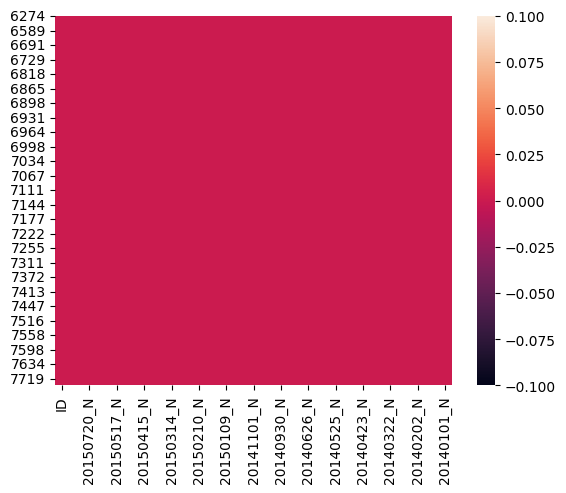

In [136]:
df_farm = df[df['class'] == 'farm']
missing_summary = df_farm.isnull().sum()
print(missing_summary) 
sns.heatmap(df_farm.isnull())

# Imputation of Forest Class

In [137]:
df_forest = df[df['class'] == 'forest'].copy()
missing_summary = df_forest.isnull().sum()
missing_percentage = (missing_summary / len(df_forest)) * 100
print(missing_percentage.sort_values(ascending=False))

20140423_N    21.967852
20140626_N    19.548628
20141016_N    18.184770
20140218_N    17.973697
20150226_N    16.885858
20141117_N    15.927910
20150602_N    14.726417
20140117_N    14.645235
20140322_N    14.158143
20150330_N    13.898360
20150125_N    13.346322
20150501_N    11.836337
20140509_N    11.040753
20150109_N    10.894626
20150517_N     9.839260
20140930_N     9.790550
20140525_N     9.514532
20150314_N     8.816366
20140407_N     7.955837
20150210_N     7.907128
20150720_N     6.997889
20140813_N     6.916707
20140202_N     6.786816
20150415_N     6.186069
20140610_N     6.137360
20140101_N     5.260594
20141101_N     4.952103
ID             0.000000
class          0.000000
dtype: float64


In [138]:
print(df_forest)

        ID   class  20150720_N  20150602_N  20150517_N  20150501_N  \
21      45  forest     2960.34    4635.050         NaN    3748.650   
22      46  forest     5353.60    5883.450     804.784     857.962   
23      47  forest         NaN    8048.820    4244.530     935.349   
24      48  forest     2636.50    7836.100    5466.180     954.376   
25      49  forest     7581.11    7538.180    6613.740    4241.700   
...    ...     ...         ...         ...         ...         ...   
7103  8993  forest     7365.62     422.585    7103.480    7870.530   
7104  8994  forest     7650.08     390.708    7816.730    7705.050   
7105  8995  forest     6635.34     809.440    7097.640    7335.730   
7106  8996  forest     7493.70     409.447    7662.740    7723.090   
7107  8997  forest     7471.90     402.622    7879.500    6644.820   

      20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
21      3766.710         NaN     757.053     1382.63  ...         NaN   
22      4828.

In [139]:
from sklearn.impute import KNNImputer

# 2. Drop non-numeric columns before imputation
df_forest_numeric = df_forest.drop(columns=['class'])

# 3. Apply KNN imputer
imputer = KNNImputer(n_neighbors=30, weights='distance')
imputed_array = imputer.fit_transform(df_forest_numeric)

# 4. Convert back to DataFrame, keep original index and columns
df_forest_imputed = pd.DataFrame(imputed_array, columns=df_forest_numeric.columns, index=df_forest.index)

# 5. Add back the 'class' column
df_forest_imputed['class'] = 'forest'

# 6. Replace rows in original df with imputed data for 'farm' rows
df.loc[df_forest.index, df_forest_imputed.columns] = df_forest_imputed

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

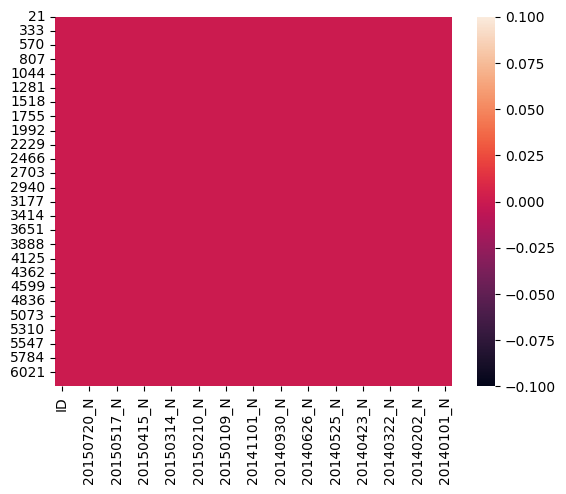

In [140]:
df_forest = df[df['class'] == 'forest']
missing_summary = df_forest.isnull().sum()
print(missing_summary) 
sns.heatmap(df_forest.isnull())

# Imputation of Grass Class

In [141]:
df_grass = df[df['class'] == 'grass'].copy()
missing_summary = df_grass.isnull().sum()
missing_percentage = (missing_summary / len(df_grass)) * 100
print(missing_percentage.sort_values(ascending=False))

20140626_N    25.000000
20140423_N    19.897959
20141117_N    18.877551
20150226_N    16.836735
20140218_N    15.816327
20150602_N    14.795918
20140117_N    13.775510
20140509_N    12.755102
20150330_N    12.755102
20141016_N    12.244898
20150501_N    11.734694
20140322_N    11.224490
20150109_N    11.224490
20140525_N    10.714286
20150125_N    10.714286
20150720_N    10.204082
20140930_N    10.204082
20150210_N     8.673469
20150517_N     8.163265
20140407_N     7.653061
20150314_N     7.653061
20140202_N     5.102041
20140813_N     5.102041
20141101_N     5.102041
20140610_N     4.591837
20140101_N     3.571429
20150415_N     3.061224
ID             0.000000
class          0.000000
dtype: float64


In [142]:
print(df_grass)

         ID  class  20150720_N  20150602_N  20150517_N  20150501_N  \
6512   7998  grass     4089.19     2784.95    1261.100     2700.32   
6611   8148  grass     7076.45     5404.19    4395.510     3470.11   
6616   8159  grass     1926.11     2181.19     293.767     1939.95   
6644   8204  grass     5765.31     3860.33     563.778     2835.16   
6645   8205  grass     3412.59     4898.36         NaN     3048.86   
...     ...    ...         ...         ...         ...         ...   
7974  10510  grass     6021.59     3853.51    3685.320     3510.59   
7975  10514  grass     6912.15     7470.73    5497.350     7152.92   
7976  10515  grass     6953.91     6171.42    4193.760     4972.80   
7980  10520  grass     5305.06     5066.99    3848.270     2030.59   
7982  10522  grass     3295.01     2904.62    2232.320     2171.32   

      20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
6512    2943.490     2850.26     3342.89    2294.800  ...     740.912   
6611    2824.

In [143]:
from sklearn.impute import KNNImputer

# 2. Drop non-numeric columns before imputation
df_grass_numeric = df_grass.drop(columns=['class'])

# 3. Apply KNN imputer
imputer = KNNImputer(n_neighbors=10, weights='distance')
imputed_array = imputer.fit_transform(df_grass_numeric)

# 4. Convert back to DataFrame, keep original index and columns
df_grass_imputed = pd.DataFrame(imputed_array, columns=df_grass_numeric.columns, index=df_grass.index)

# 5. Add back the 'class' column
df_grass_imputed['class'] = 'grass'

# 6. Replace rows in original df with imputed data for 'farm' rows
df.loc[df_grass.index, df_grass_imputed.columns] = df_grass_imputed

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

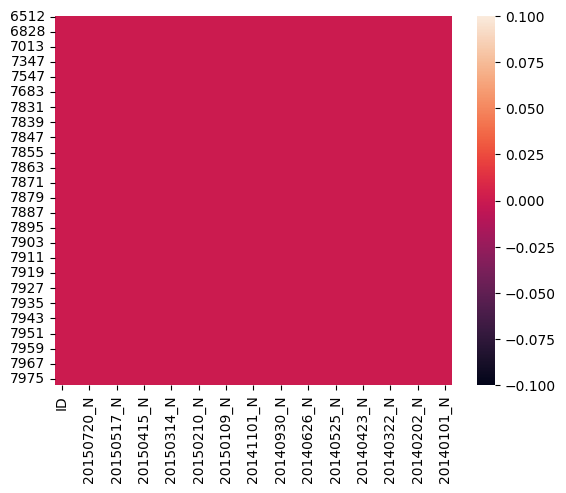

In [144]:
df_grass = df[df['class'] == 'grass']
missing_summary = df_grass.isnull().sum()
print(missing_summary) 
sns.heatmap(df_grass.isnull())

# Imputation of Impervious Class

In [145]:
df_impervious = df[df['class'] == 'impervious'].copy()
missing_summary = df_impervious.isnull().sum()
missing_percentage = (missing_summary / len(df_impervious)) * 100
print(missing_percentage.sort_values(ascending=False))

20140423_N    22.869955
20141016_N    18.834081
20140626_N    18.684604
20150226_N    18.535127
20140218_N    17.937220
20150602_N    16.890882
20140117_N    16.292975
20141117_N    15.545590
20140322_N    14.947683
20150330_N    14.050822
20150501_N    13.153961
20140509_N    11.958146
20150517_N    11.958146
20150125_N    11.808670
20150109_N    10.911809
20150314_N    10.164425
20140930_N     9.417040
20140407_N     8.819133
20140202_N     8.071749
20140813_N     7.623318
20150720_N     7.324365
20150210_N     6.875934
20140525_N     6.576981
20141101_N     6.128550
20150415_N     5.231689
20140610_N     3.587444
20140101_N     3.587444
ID             0.000000
class          0.000000
dtype: float64


In [146]:
print(df_impervious)

         ID       class  20150720_N  20150602_N  20150517_N  20150501_N  \
6257   7630  impervious     856.499     847.177    347.1200    1058.580   
6258   7631  impervious    2173.480     713.327   1105.7300    3755.090   
6259   7633  impervious     867.414     709.787    233.3790    1165.820   
6260   7634  impervious     174.889     383.228     61.7971     387.156   
6261   7636  impervious    3979.800    2950.880   2556.6700    2518.880   
...     ...         ...         ...         ...         ...         ...   
7995  10538  impervious    1207.700     984.620         NaN    1166.250   
7996  10539  impervious    2170.350    1419.720   1361.0000    1478.710   
7997  10542  impervious    1895.680    1454.740         NaN    1033.560   
7998  10543  impervious    3465.740    1283.320    413.4120    4391.050   
7999  10545  impervious    6941.190    1667.870   5084.7800         NaN   

      20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
6257     638.126  1083.630

In [147]:
# 2. Drop non-numeric columns before imputation
df_impervious_numeric = df_impervious.drop(columns=['class'])

# 3. Apply KNN imputer
imputer = KNNImputer(n_neighbors=10, weights='distance')
imputed_array = imputer.fit_transform(df_impervious_numeric)

# 4. Convert back to DataFrame, keep original index and columns
df_impervious_imputed = pd.DataFrame(imputed_array, columns=df_impervious_numeric.columns, index=df_impervious.index)

# 5. Add back the 'class' column
df_impervious_imputed['class'] = 'impervious'

# 6. Replace rows in original df with imputed data for 'farm' rows
df.loc[df_impervious.index, df_impervious_imputed.columns] = df_impervious_imputed

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

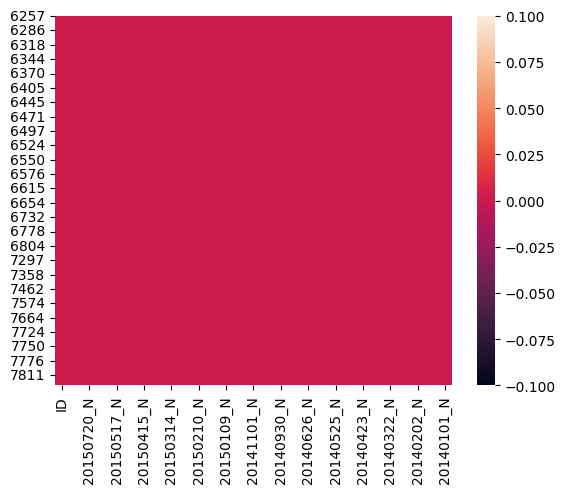

In [148]:
df_impervious = df[df['class'] == 'impervious']
missing_summary = df_impervious.isnull().sum()
print(missing_summary) 
sns.heatmap(df_impervious.isnull())

# Imputation of Orchard Class

In [149]:
df_orchard = df[df['class'] == 'orchard']
missing_summary = df_orchard.isnull().sum()
missing_percentage = (missing_summary / len(df_orchard)) * 100
print(missing_percentage.sort_values(ascending=False))

20150330_N    26.666667
20140423_N    26.666667
20140322_N    26.666667
20140610_N    23.333333
20150314_N    20.000000
20141117_N    20.000000
20150109_N    20.000000
20141016_N    20.000000
20140626_N    20.000000
20150226_N    16.666667
20140218_N    16.666667
20150602_N    16.666667
20150501_N    13.333333
20150517_N    13.333333
20150125_N    13.333333
20150415_N    13.333333
20140117_N    13.333333
20140930_N    10.000000
20140525_N    10.000000
20140407_N     6.666667
20150210_N     6.666667
20140509_N     6.666667
20140202_N     3.333333
20150720_N     3.333333
20141101_N     3.333333
ID             0.000000
class          0.000000
20140813_N     0.000000
20140101_N     0.000000
dtype: float64


In [150]:
# 1. Subset the orchard class
df_orchard = df[df['class'] == 'orchard'].copy()

# 2. Select only numeric columns (exclude 'class', 'ID', etc.)
numeric_cols = df_orchard.select_dtypes(include=['float64', 'int64']).columns
time_cols = [col for col in numeric_cols if '_N' in col]

# 3. Apply mean imputation
df_orchard[time_cols] = df_orchard[time_cols].fillna(df_orchard[time_cols].median())

# 4. Update original DataFrame
df.loc[df['class'] == 'orchard', time_cols] = df_orchard[time_cols] 

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

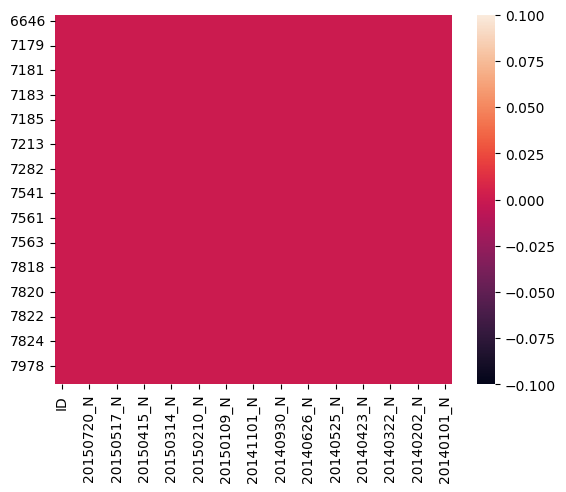

In [151]:
df_orchard = df[df['class'] == 'orchard']

missing_summary = df_orchard.isnull().sum()
print(missing_summary) 
sns.heatmap(df_orchard.isnull())


# Imputation of Water Class

In [152]:
df_water = df[df['class'] == 'water']
missing_summary = df_water.isnull().sum()
missing_percentage = (missing_summary / len(df_water)) * 100
print(missing_percentage.sort_values(ascending=False))

20140626_N    24.761905
20140423_N    23.809524
20140218_N    23.809524
20150602_N    23.809524
20140930_N    18.095238
20141016_N    17.142857
20140117_N    16.190476
20141117_N    16.190476
20150517_N    15.238095
20150226_N    15.238095
20140322_N    14.285714
20150210_N    13.333333
20140509_N    13.333333
20150501_N    10.476190
20150330_N     9.523810
20150109_N     8.571429
20140525_N     8.571429
20140202_N     7.619048
20140407_N     7.619048
20140610_N     6.666667
20150314_N     6.666667
20150415_N     5.714286
20141101_N     5.714286
20140813_N     5.714286
20150125_N     5.714286
20140101_N     4.761905
20150720_N     3.809524
ID             0.000000
class          0.000000
dtype: float64


In [153]:
from sklearn.impute import KNNImputer

# 2. Drop non-numeric columns before imputation
df_water_numeric = df_water.drop(columns=['class'])

# 3. Apply KNN imputer
imputer = KNNImputer(n_neighbors=8, weights='distance')
imputed_array = imputer.fit_transform(df_water_numeric)

# 4. Convert back to DataFrame, keep original index and columns
df_water_imputed = pd.DataFrame(imputed_array, columns=df_water_numeric.columns, index=df_water.index)

# 5. Add back the 'class' column
df_water_imputed['class'] = 'water'

# 6. Replace rows in original df with imputed data for 'water' rows
df.loc[df_water.index, df_water_imputed.columns] = df_water_imputed

ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


<Axes: >

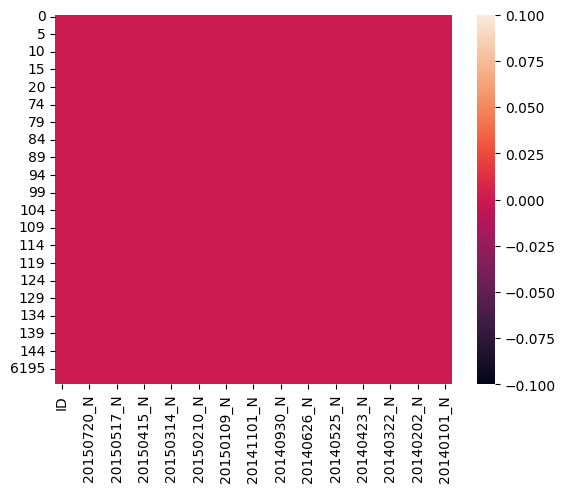

In [154]:
df_water = df[df['class'] == 'water']
missing_summary = df_water.isnull().sum()
print(missing_summary) 
sns.heatmap(df_water.isnull())

# check changes in statistics


=== Summary of Statistical Differences (Original vs Imputed) ===

            Original_Mean  Imputed_Mean  Mean_Diff  Original_Std  Imputed_Std  \
20140101_N        2578.45       2579.75       1.30       2436.27      2410.35   
20140117_N        2629.20       2620.78      -8.42       2386.15      2315.61   
20140202_N        6259.06       6245.57     -13.49       1825.56      1819.86   
20140218_N        2144.36       2139.92      -4.44       2267.61      2177.79   
20140322_N        2799.82       2792.65      -7.17       2452.56      2354.08   
20140407_N        2041.32       2035.80      -5.52       2040.35      2000.88   
20140423_N        3055.17       3043.84     -11.33       2209.99      2046.77   
20140509_N        3012.18       2999.50     -12.67       2068.33      1991.38   
20140525_N        3674.89       3674.09      -0.80       2331.11      2264.37   
20140610_N        4872.68       4875.88       3.20       2776.14      2735.60   
20140626_N        2990.75       2985.17   

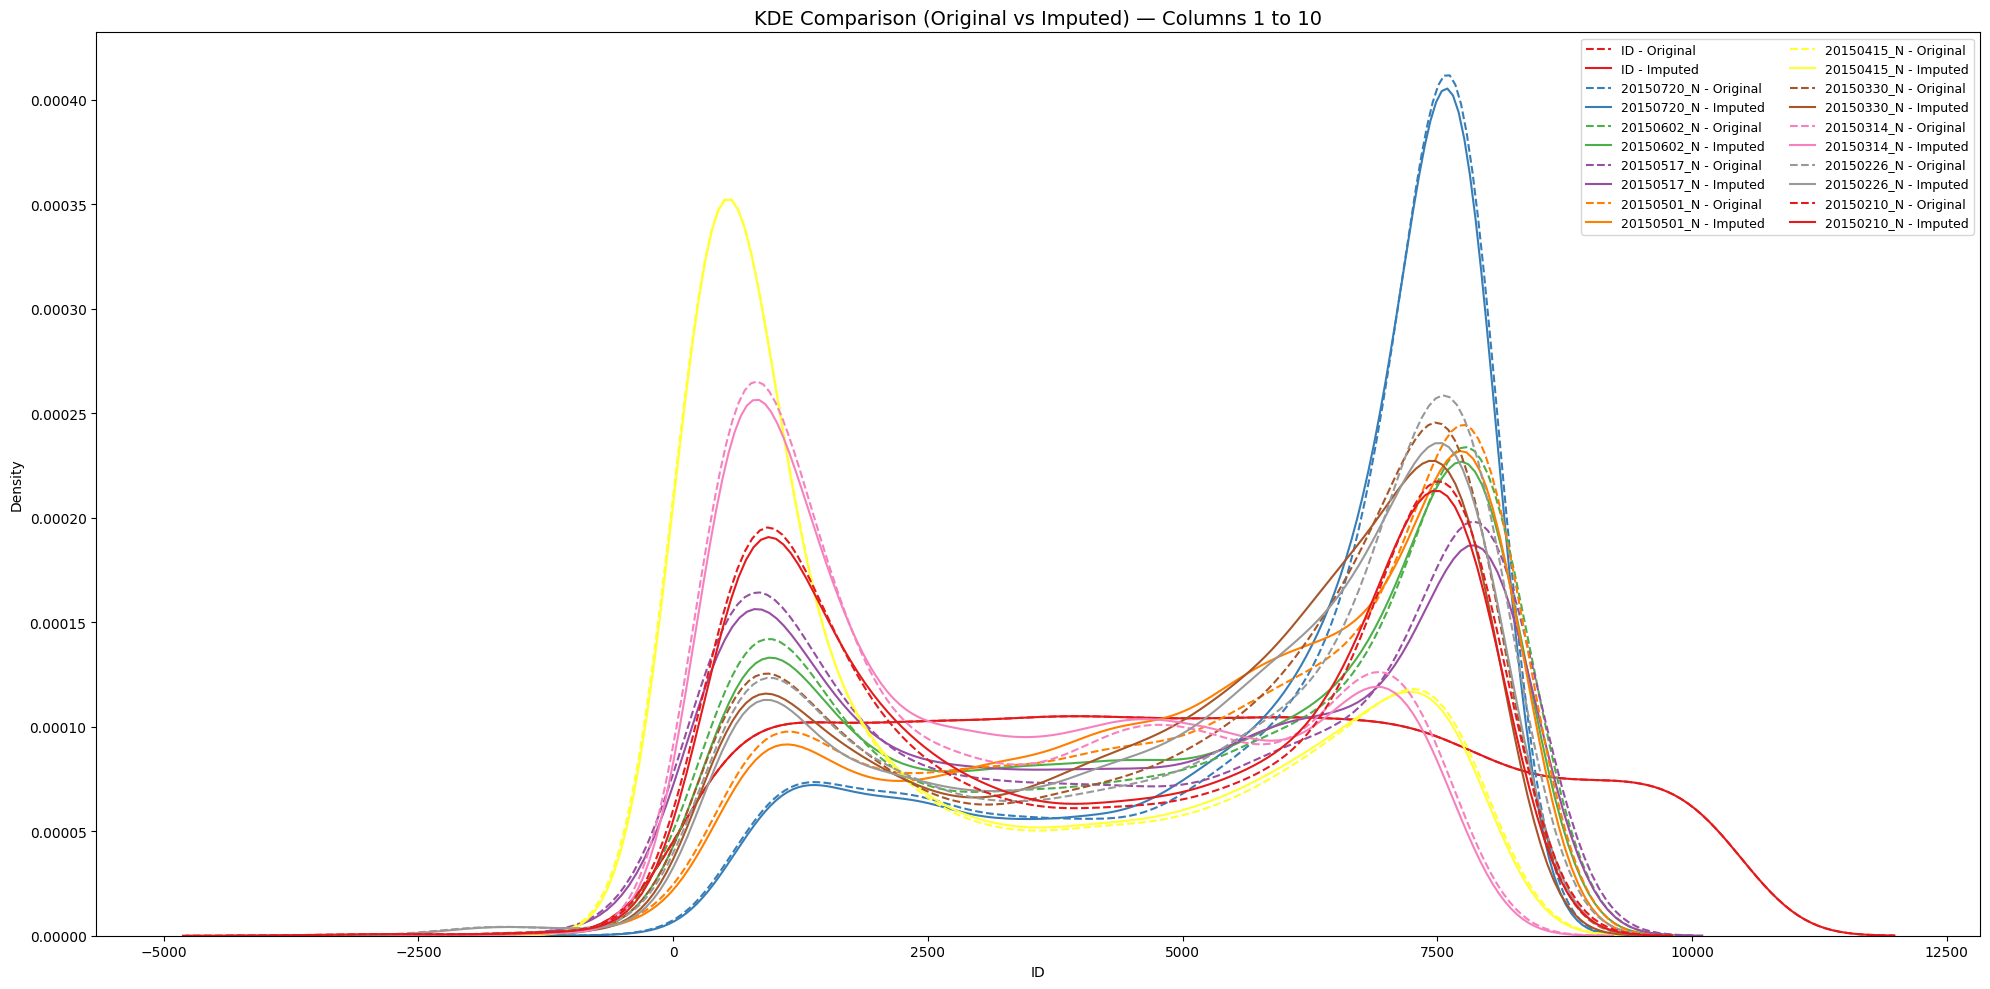

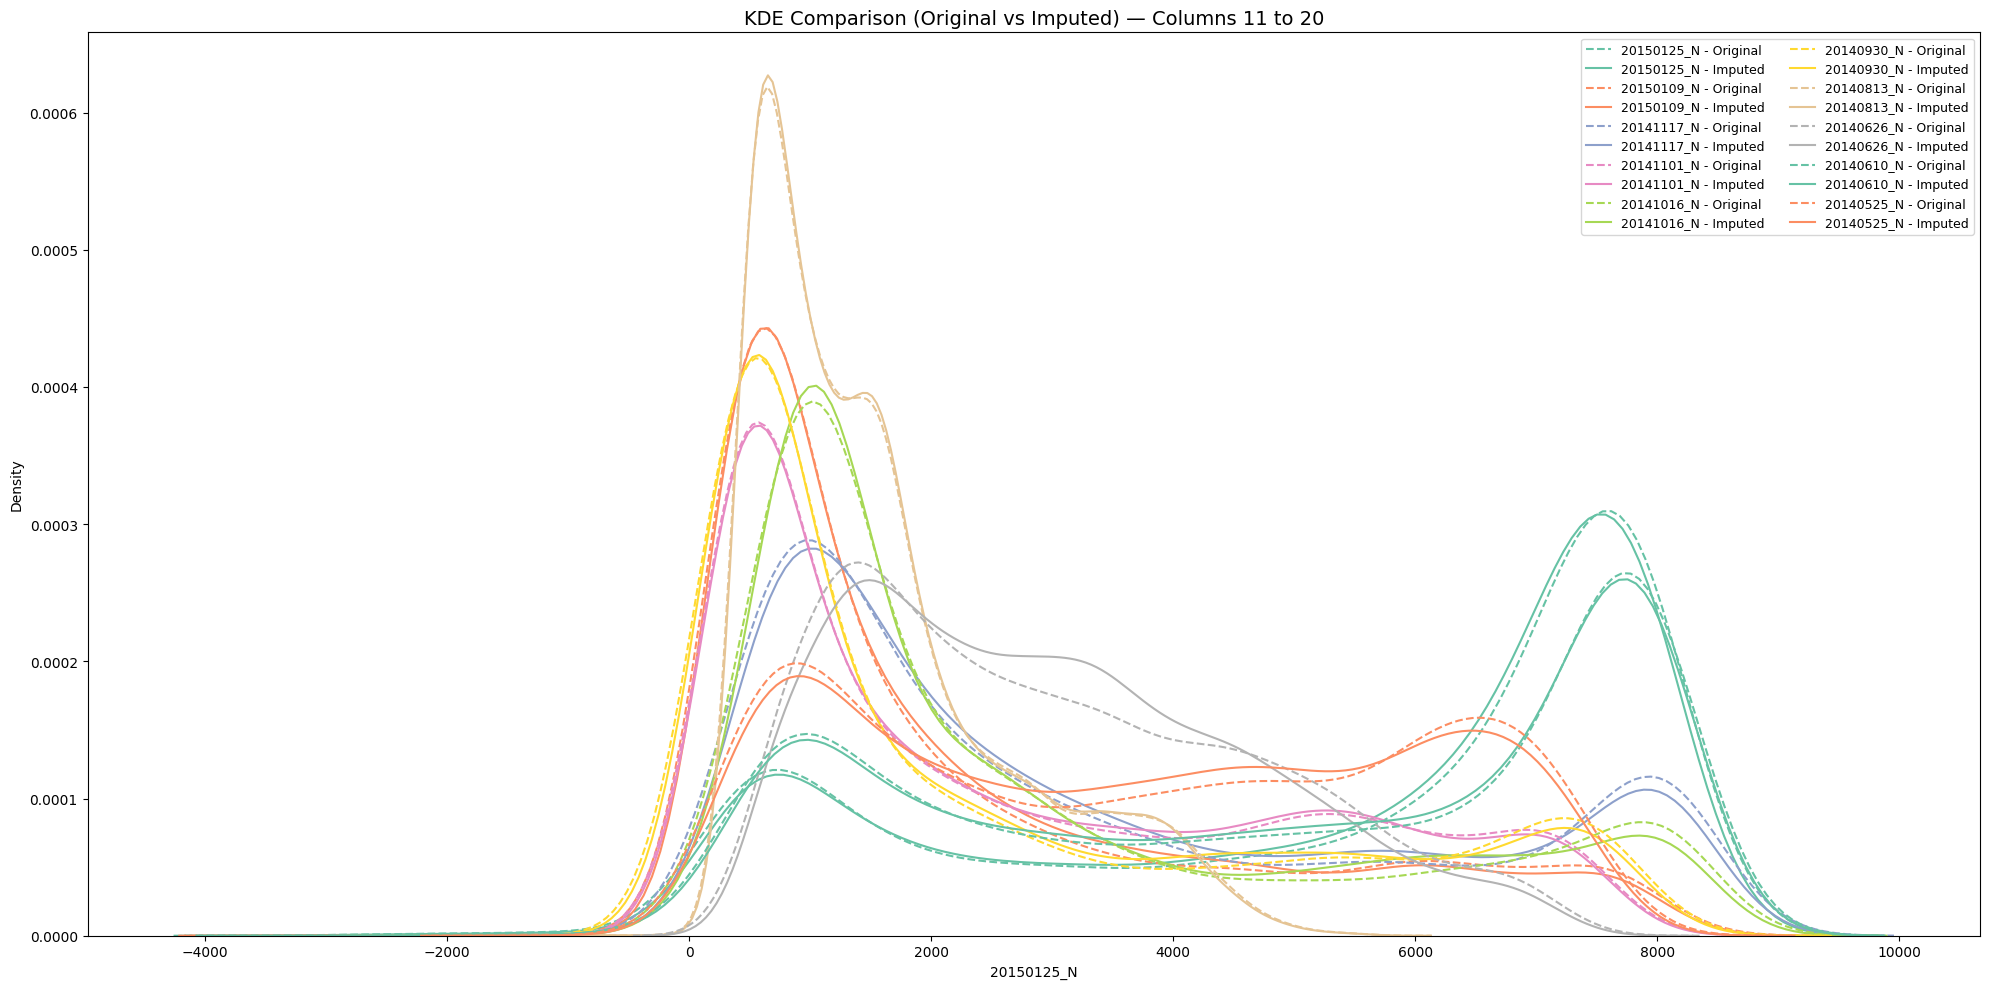

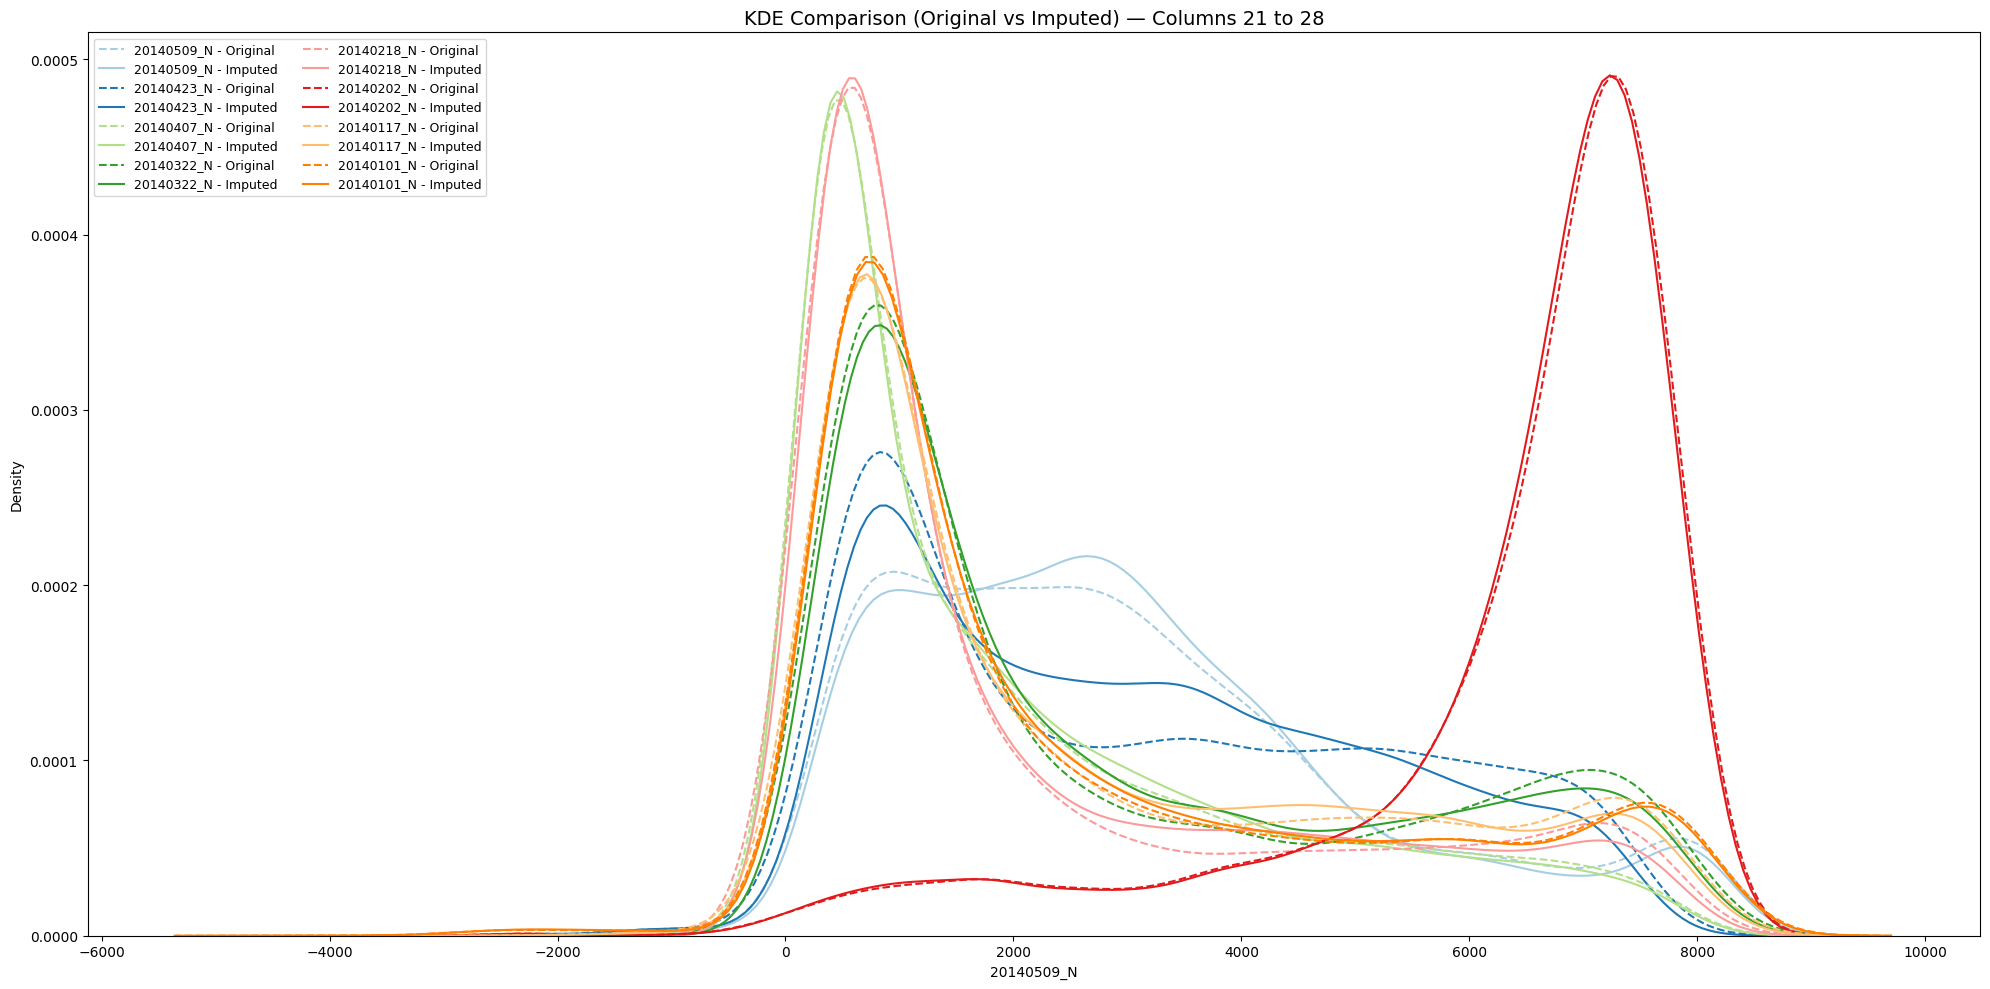

In [155]:
# Step 1: Load original (non-imputed) data
df_original = pd.read_csv('hacktrain.csv')  # Replace with your actual path

# Step 2: `df` is your imputed DataFrame (already in memory)

# Step 3: Summary of statistics (unchanged)
summary = pd.DataFrame({
    'Original_Mean': df_original.mean(numeric_only=True),
    'Imputed_Mean': df.mean(numeric_only=True),
    'Mean_Diff': df.mean(numeric_only=True) - df_original.mean(numeric_only=True),
    'Original_Std': df_original.std(numeric_only=True),
    'Imputed_Std': df.std(numeric_only=True),
    'Std_Diff': df.std(numeric_only=True) - df_original.std(numeric_only=True)
}).round(2)

print("\n=== Summary of Statistical Differences (Original vs Imputed) ===\n")
print(summary)

# Step 4: KDE Plots in 3 Batches with consistent colors
numeric_cols = df.select_dtypes(include='number').columns
batch_size = 10

# Define color palettes to alternate
palettes = ['Set1', 'Set2', 'Paired']

for batch_idx, i in enumerate(range(0, len(numeric_cols), batch_size)):
    batch_cols = numeric_cols[i:i + batch_size]
    palette = sns.color_palette(palettes[batch_idx % len(palettes)], n_colors=len(batch_cols))

    plt.figure(figsize=(20, 10))
    for col, color in zip(batch_cols, palette):
        # Original with dashed line
        sns.kdeplot(df_original[col], label=f'{col} - Original', linestyle='--', color=color)
        # Imputed with solid line
        sns.kdeplot(df[col], label=f'{col} - Imputed', linestyle='-', color=color)

    plt.title(f'KDE Comparison (Original vs Imputed) — Columns {i+1} to {i+len(batch_cols)}', fontsize=14)
    plt.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()


# Model Training

In [ ]:
import os
import json
import joblib
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import classification_report

# === USER PARAMETERS ===
degrees = [1, 2]
n_iter = 50                     # total random draws per degree
random_state = 42
output_dir = "random_search_outputs"
# ========================

# 1) Load & Prepare data
# Replace 'your_data.csv' with your actual data path
# DataFrame must include a column 'ID' (to drop) and 'class'
 
df.drop(columns=['ID'], inplace=True)

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

X = df.drop(columns=['class']).astype(np.float32)
y = df['class'].astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state, stratify=y
)

# 2) Define solver-specific hyperparameter distributions
param_dist = [
    {
        'clf__solver':       ['saga'],
        'clf__penalty':      ['l1', 'l2'],
        'clf__C':            [0.1, 1, 10, 100],
        'clf__class_weight': [None, 'balanced'],
    },
    {
        'clf__solver':       ['lbfgs'],
        'clf__penalty':      ['l2'],  # lbfgs only supports l2
        'clf__C':            [0.1, 1, 10, 100],
        'clf__class_weight': [None, 'balanced'],
    }
]

# 3) Ensure output directories exist
os.makedirs(output_dir, exist_ok=True)

for degree in degrees:
    deg_dir = os.path.join(output_dir, f"degree_{degree}")
    models_dir = os.path.join(deg_dir, "models")
    reports_dir = os.path.join(deg_dir, "reports")
    prog_file = os.path.join(deg_dir, "progress.json")
    os.makedirs(models_dir, exist_ok=True)
    os.makedirs(reports_dir, exist_ok=True)

    # load or initialize progress
    if os.path.exists(prog_file):
        with open(prog_file, 'r') as f:
            completed = set(json.load(f))
    else:
        completed = set()

    # generate random parameter settings
    sampler = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=random_state))

    print(f"\n=== Starting degree={degree}, {n_iter} draws ===")
    try:
        for i, params in enumerate(sampler):
            if i in completed:
                continue
            print(f"-- Trial {i+1}/{n_iter}: {params}")

            # build pipeline with polynomial features
            pipe = Pipeline([
                ('poly',   PolynomialFeatures(degree=degree, include_bias=False)),
                ('scaler', StandardScaler()),
                ('clf',    LogisticRegression(max_iter=50000, tol=1e-4, warm_start=True))
            ])
            pipe.set_params(**params)

            # fit & evaluate
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

            # save model
            model_path = os.path.join(models_dir, f"model_{i}.pkl")
            joblib.dump(pipe, model_path)

            # write report + params
            report_path = os.path.join(reports_dir, f"report_{i}.txt")
            with open(report_path, 'w') as f:
                f.write(f"Parameters:\n{json.dumps(params, indent=2)}\n\n")
                f.write("Classification Report:\n")
                f.write(report)

            # checkpoint
            completed.add(i)
            with open(prog_file, 'w') as f:
                json.dump(sorted(completed), f)

    except KeyboardInterrupt:
        print("🔶 Search interrupted by user. Progress saved; re-run to resume.")

    print(f"✅ Degree={degree} done; {len(completed)}/{n_iter} trials completed.")


KeyboardInterrupt: 

In [ ]:
test_data = pd.read_csv("hacktest.csv")
test_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.shape

In [ ]:
test_data.columns

In [ ]:
IDs = test_data['ID'].copy()
test_data.drop(columns=['ID'], inplace=True)    

In [ ]:
y_test_pred = best_model.predict(test_data)

In [ ]:
y_decoded = label_encoder.inverse_transform(y_test_pred)

In [ ]:
submission = pd.DataFrame({
    'ID':       IDs,
    'class':    y_decoded
})
submission.to_csv("submission.csv", index=False)
print("Wrote submission.csv with", len(submission), "rows.")